# Implimented ANN from scratch 

Epoch 0: Loss = 0.3387
Epoch 100: Loss = 0.3087
Epoch 200: Loss = 0.2997
Epoch 300: Loss = 0.2934
Epoch 400: Loss = 0.2902
Epoch 500: Loss = 0.2892
Epoch 600: Loss = 0.2888
Epoch 700: Loss = 0.2885
Epoch 800: Loss = 0.2882
Epoch 900: Loss = 0.2881


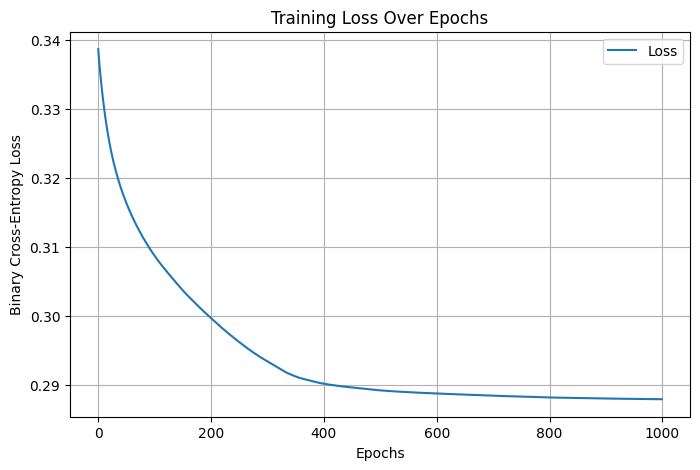

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and ReLU activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate sample data: 2 classes (binary classification)
def generate_data(n=500):
    np.random.seed(42)
    x1 = np.random.randn(n//2, 2) + np.array([0, -1])
    x2 = np.random.randn(n//2, 2) + np.array([1, 1])
    X = np.vstack((x1, x2))
    y = np.array([0]*(n//2) + [1]*(n//2)).reshape(-1, 1)
    return X, y

# Neural Network class
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size):
        np.random.seed(1)
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, lr=0.01):
        m = y.shape[0]
        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_deriv(self.Z1)
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=1000, lr=0.01):
        loss_history = []
        for i in range(epochs):
            y_pred = self.forward(X)
            loss = binary_cross_entropy(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y, lr)
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {loss:.4f}")
        return loss_history

# Main execution
if __name__ == "__main__":
    X, y = generate_data()

    model = SimpleANN(input_size=2, hidden_size=4, output_size=1)
    losses = model.train(X, y, epochs=1000, lr=0.1)

    # Plotting the loss
    plt.figure(figsize=(8,5))
    plt.plot(losses, label="Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Cross-Entropy Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
